In [19]:
# Assign input x and observed output b
import numpy as np
import matplotlib.pyplot as plt
import math
import random
x=np.arange(-.5,.6,.1)
pii=math.pi
#if initial data was noiseless
b_clean=np.sin(2*pii*x)
#now there are noisy initial data
b0=np.sin(2*pii*x)-.1
randomList = []
# Set a length of the list to 10
for i in range(0, 11):
    # any random numbers from 0 to 1000
    randomList.append((random.randint(-50, 100))/100)
randn=np.array(randomList)

#generate b
b=b0+.2*randn

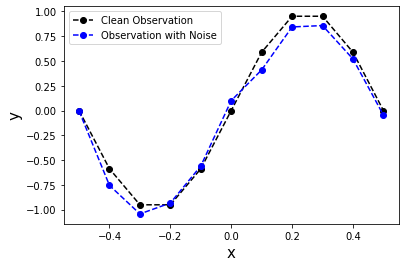

In [20]:
#plot (x,b0)
#plot
plt.plot(x, b_clean, linestyle='--',marker='o',color='black',label='Clean Observation',linewidth=1.5) 
plt.plot(x, b, linestyle='--',marker='o',color='blue',label='Observation with Noise',linewidth=1.5) 
#plt.plot(x, yt, linestyle='--',marker='o',color='black',label='Observation with Noise',linewidth=1.5)  
plt.xlabel('x',fontsize='15')
plt.ylabel('y',fontsize='15')
plt.legend()

In [4]:
#create the M order polynomial matrix X
def calc_matrix(x,m):
  n=len(x)
  #m=3
  A=np.zeros((n,m+1))
  for i in range(m+1):
      A[:,i]=x**i
      #A[:,1]=x
      #A[:,2]=np.square(x)
      #A[:,3]=x**3
  
  return A

In [5]:
#calculate the matrix A for M=9
A=calc_matrix(x,9)

In [6]:
#calculate weight vector for regularized linear regression
def calc_wreg(x_train,y_train,l):
  a1=np.dot(np.transpose(x_train),x_train)
  a1_inv=np.linalg.inv(a1)
  a2=np.dot(a1_inv,np.transpose(x_train))
  I=np.identity(len(a2))
  I_l=np.multiply(I,l)
  a2=a1+I_l
  a2_inv=np.linalg.inv(a2)
  a3=np.dot(a2_inv,np.transpose(x_train))
  wreg=np.dot(a3,y_train)
  yt=np.dot(x_train,wreg)
  return wreg


In [10]:
#calculate prediction on new data
def predict(x,w):
  yt=np.dot(x,w)
  return yt


In [11]:
#calculate the error 
def error_LF(X, y, W):
    pred=predict(X,W)
    e=(pred-y)**2
    error=np.sqrt(e)
    return error

In [12]:
#calculate the validation error 
def calc_Eval(X_val,Y_val,w):
  Eval =error_LF(X_val, Y_val, w)
  #Eval*100
  return Eval

In [ ]:
b.shape

(11,)

In [13]:
l=[10e-12,10e-9,10e-7,10e-5,10e-3,10e-1,.5,1]  #lambda

In [15]:
#calculate validation error using leave one out method
def calc_val_error(X,Y,l):
  X_Val=np.zeros(X.shape)
  Y_Val=np.zeros(Y.shape)
  Eval=np.zeros(11)
  
  for i in range(11):
    X_Val[i,:]=X[i,:]
    X_train=np.delete(X,[i],axis=0)
    Y_Val[i]=Y[i]
    Y_train=np.delete(Y,[i],axis=0)
    #print(Y_train.shape)
    wr=calc_wreg(X_train,Y_train,l)
    Eval[i]=calc_Eval(X_Val[i,:],Y_Val[i],wr)
  
  Eval_final=np.average(Eval)
  return Eval_final



In [21]:
E_validation=np.zeros(len(l))
#Eout=np.zeros(len(l))
for j in range(len(l)):
  #wr[i,:]=calc_wreg(X_train,Y_train,l[i])
  #Eval[i]=calc_Eval(X_train,Y_train,wr[i])
  E_validation[j]=calc_val_error(A,b,l[j])
j=np.argmin(E_validation)
lbest=l[j]
print('The best regularization parameter:',lbest)

The best regularization parameter: 1e-06


In [17]:
E_validation

array([1.43907459, 0.66990311, 0.20872165, 0.20579205, 0.4424969 ,
       0.55095549, 0.54354624, 0.55095549])

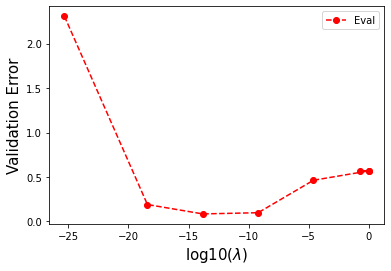

In [24]:
#plot (x,b0)
#plot
plt.plot(np.log(l), E_validation, linestyle='--',marker='o',color='red',label='Eval',linewidth=1.5) 
#plt.plot(l, Eout,linestyle='--',marker='o',color='red',label='Eout',linewidth=1.5) 
#plt.plot(x, yt, linestyle='--',marker='o',color='black',label='Observation with Noise',linewidth=1.5)  
plt.xlabel('log10($\lambda$)',fontsize='15')
plt.ylabel('Validation Error',fontsize='15')
plt.legend()